In [75]:
import os
import sys
import random
import warnings

import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Dense, UpSampling2D, Flatten
from tensorflow.keras.optimizers import Adam
from livelossplot import PlotLossesKeras

In [5]:
seed = 0

random.seed(seed)
np.random.seed(seed)
tf.random.set_seed(seed)

In [52]:
IMG_HEIGHT = 28
IMG_WIDTH = 28

input_shape = (1, IMG_HEIGHT, IMG_WIDTH, 1)

path = './sign_language/'

In [53]:
# Loading data into numpy arrays

train = np.genfromtxt(path+'sign_mnist_train.csv',delimiter=',', skip_header=True)

test = np.genfromtxt(path+'sign_mnist_test.csv',delimiter=',', skip_header=True)

In [54]:
train.shape, test.shape

((27455, 785), (7172, 785))

In [55]:
y_train = train[:,0]
X_train = train[:,1:].reshape(train.shape[0], 28, 28, 1)/255

y_test = test[:,0]
X_test = test[:,1:].reshape(test.shape[0], 28, 28, 1)/255

In [56]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((27455, 28, 28, 1), (27455,), (7172, 28, 28, 1), (7172,))

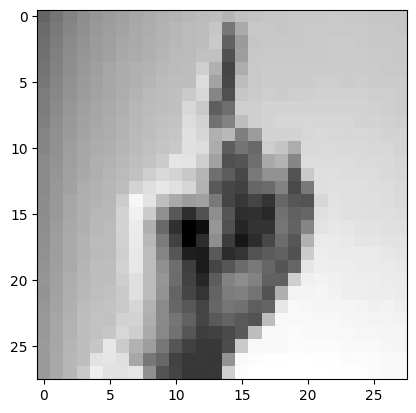

In [82]:
plt.imshow(X_train[0], cmap='gray')

In [60]:
input_shape = (28, 28, 1)

In [72]:
dropout_rate = 0.2


model = Sequential()


model.add(Conv2D(filters=32, kernel_size=3, padding='same', input_shape=input_shape))
model.add(Conv2D(filters=32, kernel_size=3, padding='same'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=64, kernel_size=3, padding='same'))
model.add(Conv2D(filters=64, kernel_size=3, padding='same'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=128, kernel_size=3, padding='same'))
model.add(Conv2D(filters=128, kernel_size=3, padding='same'))
model.add(Dropout(rate=dropout_rate))
model.add(Flatten())

model.add(Dense(units=64, activation='relu'))
model.add(Dense(units=64, activation='relu'))
model.add(Dense(units=25, activation='softmax'))


callbacks = [
    keras.callbacks.EarlyStopping(
        monitor='val_loss',
        min_delta=0.0001,
        patience=5,
        verbose=1,
        mode='auto'
    ),
    PlotLossesKeras()
]

optimizer = Adam()

model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [73]:
model.summary()

Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_46 (Conv2D)              │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_47 (Conv2D)              │ (None, 28, 28, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_14 (MaxPooling2D) │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_48 (Conv2D)              │ (None, 14, 14, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_49 (Conv2D)              │ (None, 14, 14, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_15 (MaxPooling2D) │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_50 (Conv2D)              │ (None, 7, 7, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_51 (Conv2D)              │ (None, 7, 7, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 7, 7, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 6272)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 64)             │       401,472 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 25)             │         1,625 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 693,689 (2.65 MB)

 Trainable params: 693,689 (2.65 MB)

 Non-trainable params: 0 (0.00 B)

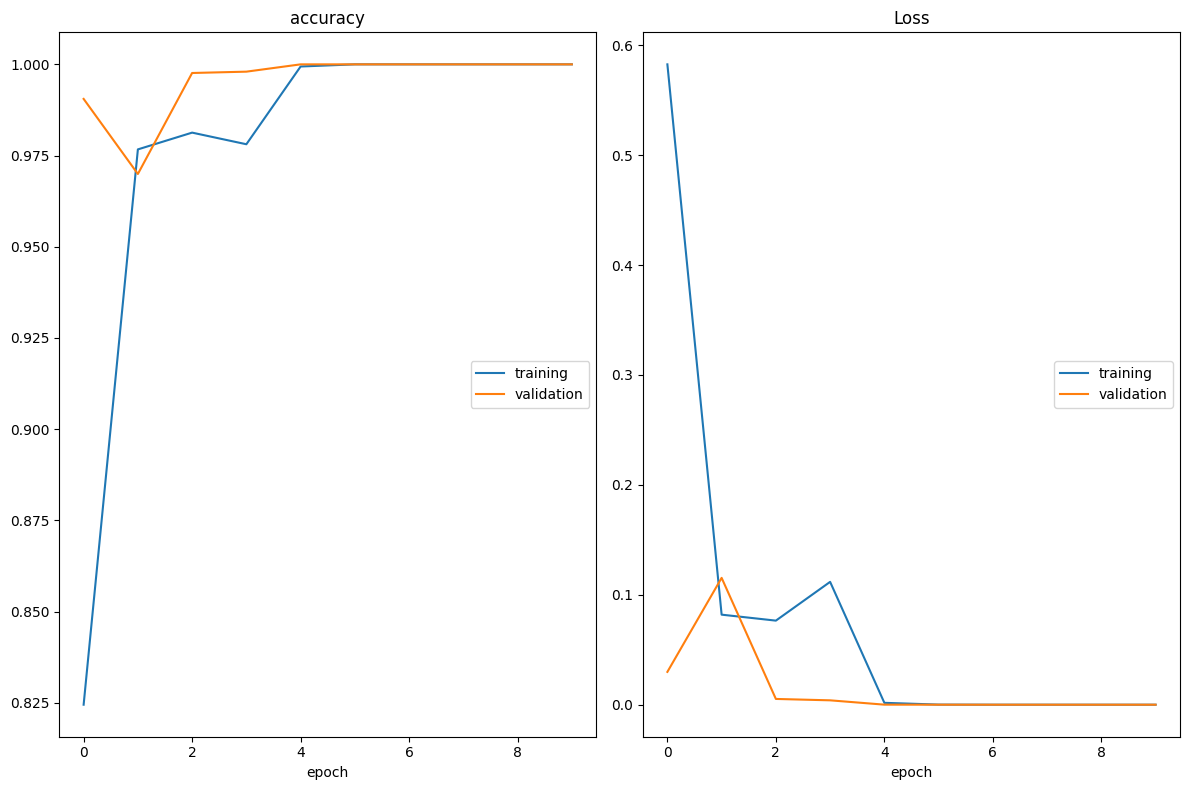

accuracy
	training         	 (min:    0.824, max:    1.000, cur:    1.000)
	validation       	 (min:    0.970, max:    1.000, cur:    1.000)
Loss
	training         	 (min:    0.000, max:    0.583, cur:    0.000)
	validation       	 (min:    0.000, max:    0.115, cur:    0.000)
687/687 ━━━━━━━━━━━━━━━━━━━━ 23s 34ms/step - accuracy: 1.0000 - loss: 2.6836e-06 - val_accuracy: 1.0000 - val_loss: 2.5779e-06
Epoch 10: early stopping


In [74]:
model.fit(X_train, y_train, batch_size=32,
          epochs=50, 
          validation_split = 0.2,
          callbacks=[PlotLossesKeras(),callbacks])

In [76]:
# Evaluate the final model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Final Test Accuracy: {accuracy:.4f}")

225/225 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.9179 - loss: 0.6152
Final Test Accuracy: 0.9230


Pretty decent for a first attempt, but lets try to improve upon it.

In [96]:
dropout_rate = 0.2


model_2 = Sequential()


model_2.add(Conv2D(filters=32, kernel_size=3, padding='same', input_shape=input_shape))
model_2.add(Conv2D(filters=32, kernel_size=3, padding='same'))
model_2.add(MaxPooling2D(pool_size=(2,2)))

model_2.add(Conv2D(filters=64, kernel_size=3, padding='same'))
model_2.add(Conv2D(filters=64, kernel_size=3, padding='same'))
model_2.add(MaxPooling2D(pool_size=(2,2)))
model_2.add(Dropout(rate=dropout_rate))

model_2.add(Conv2D(filters=128, kernel_size=3, padding='same'))
model_2.add(Conv2D(filters=128, kernel_size=3, padding='same'))
model_2.add(Dropout(rate=dropout_rate*1.5))
model_2.add(Flatten())

model_2.add(Dense(units=64, activation='relu'))
model_2.add(Dropout(rate=dropout_rate*2))
model_2.add(Dense(units=64, activation='relu'))
model_2.add(Dropout(rate=dropout_rate))
model_2.add(Dense(units=25, activation='softmax'))


callbacks = [
    keras.callbacks.EarlyStopping(
        monitor='val_loss',
        min_delta=0.0001,
        patience=3,
        verbose=1,
        mode='auto'
    ),
    PlotLossesKeras()
]

optimizer = Adam()

model_2.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

/Users/koa/Documents/ML Course/miniprojects/.venv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


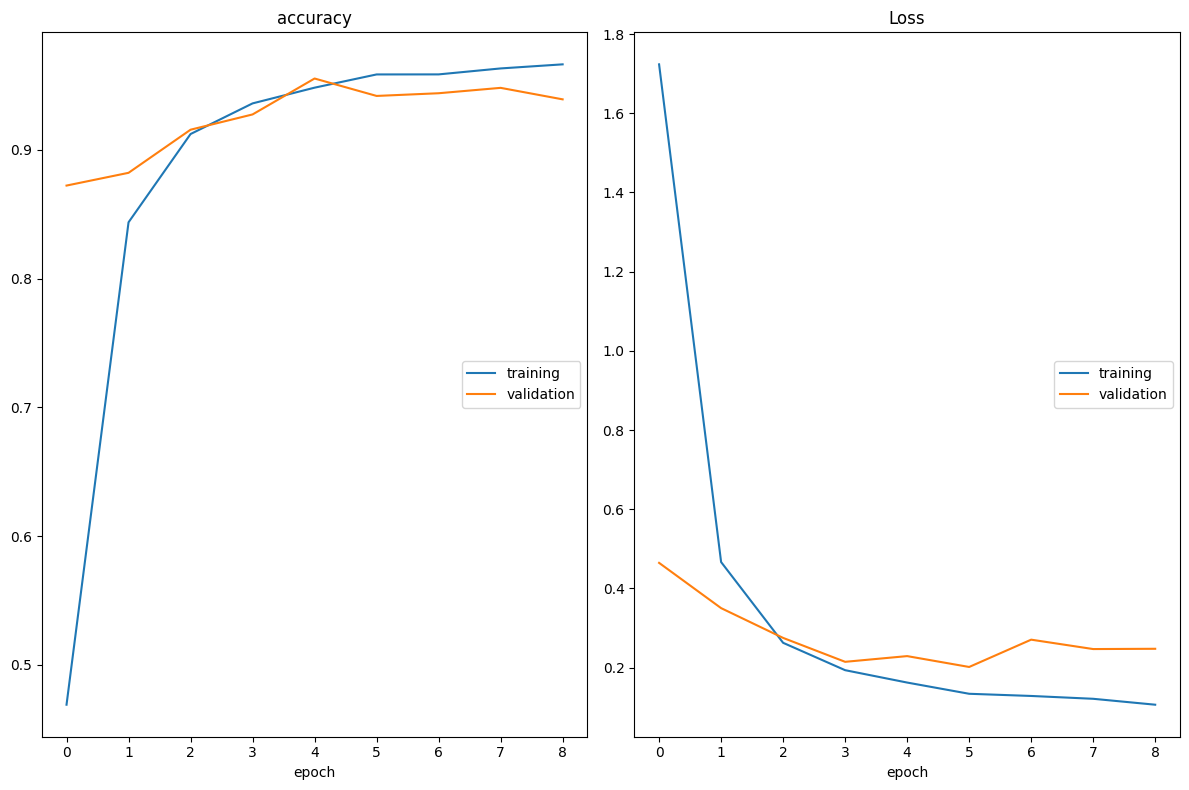

accuracy
	training         	 (min:    0.469, max:    0.966, cur:    0.966)
	validation       	 (min:    0.872, max:    0.955, cur:    0.939)
Loss
	training         	 (min:    0.106, max:    1.724, cur:    0.106)
	validation       	 (min:    0.202, max:    0.465, cur:    0.248)
215/215 ━━━━━━━━━━━━━━━━━━━━ 26s 123ms/step - accuracy: 0.9676 - loss: 0.1024 - val_accuracy: 0.9391 - val_loss: 0.2476
Epoch 9: early stopping
225/225 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.9390 - loss: 0.2394
Final Test Accuracy: 0.9391


In [97]:
model_2.fit(X_train, y_train, batch_size=128,
          epochs=50, 
          validation_data =(X_test,y_test),
          callbacks=[PlotLossesKeras(),callbacks])

# Evaluate the final model
loss, accuracy = model_2.evaluate(X_test, y_test)
print(f"Final Test Accuracy: {accuracy:.4f}")

There thats a little bit better!